In [20]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [21]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        cost = (((w*x[i]) + b) - y[i])
        dj_dw += cost * x[i]
        dj_db += cost
        
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db

In [22]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, gradient_function):
    w = w_in
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db

    return w, b

In [25]:
def calculate_scalars(features):
    feature_average = np.sum(features)/features.size
    feature_range = np.ptp(features)
    return feature_average, feature_range

def scaled_features(features, feature_average, feature_range):
    return (features - feature_average)/feature_range

def linear_func(m, x, b):
    return m*x + b

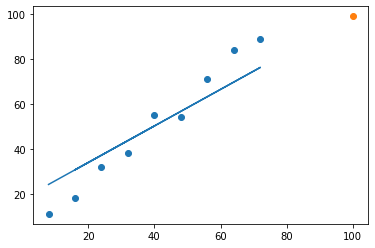

In [28]:
house_size = np.array([1.0, 6.0, 7.0, 8.0, 9.0, 2.0, 3.0, 4.0, 5.0])*8
house_price = np.array([11.0, 54.0, 71.0, 84.0, 89.0, 18.0, 32.0, 38.0, 55.0])

w_init = 0
b_init = 0
iterations = 1001
tmp_alpha = 0.01

feature_average, feature_range = calculate_scalars(house_size)
scaled_house_size = scaled_features(house_size, feature_average, feature_range)

w_final, b_final = gradient_descent(scaled_house_size, house_price, w_init, b_init, tmp_alpha, iterations, compute_gradient)

yhats = linear_func(w_final, scaled_house_size, b_final)
plt.plot(house_size, yhats)
plt.scatter(house_size, house_price)

new_house_size = 100
scaled_new_house_size = scaled_features(new_house_size, feature_average, feature_range)
new_prediction = linear_func(w_final, scaled_new_house_size, b_final)
plt.scatter(new_house_size, new_prediction)